<a href="https://colab.research.google.com/github/PabloNatB/Projects/blob/main/PCA_recreation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
"""
Created on Thu Aug 24 18:12:01 2023

@author: TUF-PC8
"""
import numpy as np
import matplotlib.pyplot as plt

#Dataset (D)
D = np.array([[10,30], [20,40], [30,35], [40,45], [50,50]])


In [2]:

#Paso 1. Calculando Vector de medias
mean = np.mean(D, axis =0)

#Paso 2. Calculando Matriz de covarianza de la matriz D
C = np.cov(D, rowvar=False, bias=True)

#Paso 3. Calculando eigenvalores y eigenvectores
eigval, eigvec = np.linalg.eig(C)


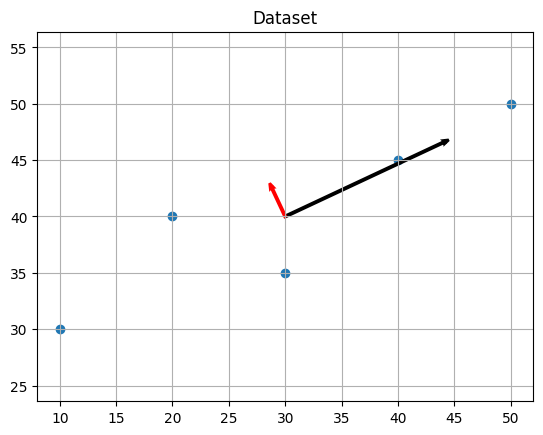

In [3]:

# Grafica del conjunto de datos
plt.figure()
plt.scatter(D[:,0],D[:,1])

# Gráfica de eigenvectores centrados en la media, escalados por la raíz cuadrada de sus eigenvalores
plt.arrow(*mean, *eigvec[:, 0]*np.sqrt(eigval[0]), width=0.1, color="k", lw=2,
          overhang=0.1)
plt.arrow(*mean, *eigvec[:, 1]*np.sqrt(eigval[1]), width=0.1, color="r", lw=2,
          overhang=0.1)
plt.grid(True)
plt.axis('equal')
plt.title("Dataset")
plt.show()

In [4]:
#Proyectando a la nueva dimensión


#ordenar vectores
idx = eigval.argsort()
eigval = eigval[idx]
eigvec = eigvec[:,idx]
#Definir función de proyección
def proyect(vec1,vec2):
    prp=np.dot(vec1,vec2)
    #vc2=np.linalg.norm(vec2)
    proyection=(prp)*vec2
    return proyection
#llenar la matriz con los vectores nuevos
newD=[]
for i in range(len(D)):
    vec=np.array([D[i,0],D[i,1]])-mean
    newD.append(proyect(vec,eigvec[-1]))


nD=np.array(newD)+mean

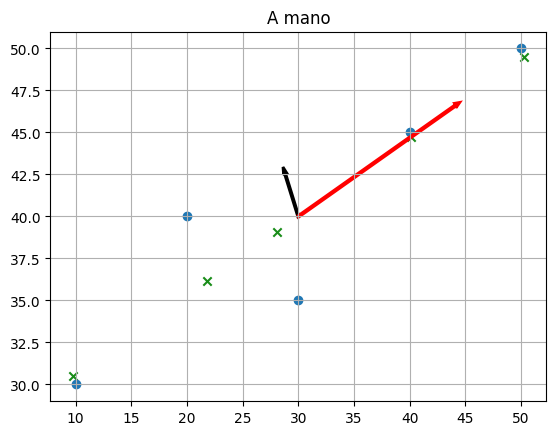

In [5]:

#graficar los nuevos vectores
plt.scatter(nD[:, 0], nD[:, 1], alpha=0.9,marker="x",c="green")
plt.scatter(D[:,0],D[:,1])
plt.arrow(*mean, *eigvec[:, 0]*np.sqrt(eigval[0]), width=0.1, color="k", lw=2,
          overhang=0.1)
plt.arrow(*mean, *eigvec[:, 1]*np.sqrt(eigval[1]), width=0.1, color="r", lw=2,
          overhang=0.1)
plt.title("A mano")
plt.grid(True)
plt.show()



In [6]:
#Implementación de PCA en sklearn
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca.fit(D)

print(pca.components_)
print(pca.explained_variance_)

def draw_vector(v0, v1, ax=None):
    ax = ax or plt.gca()
    arrowprops=dict(arrowstyle='->',
                    linewidth=2,
                    shrinkA=0, shrinkB=0)
    ax.annotate('', v1, v0, arrowprops=arrowprops)



[[-0.90558942 -0.4241554 ]
 [ 0.4241554  -0.90558942]]
[302.69218142   9.80781858]


printing  vector.... [-15.75549101  -7.37947725]
printing  vector.... [ 1.32834599 -2.83607396]
original shape:    (5, 2)
transformed shape: (5, 1)
[302.69218142]


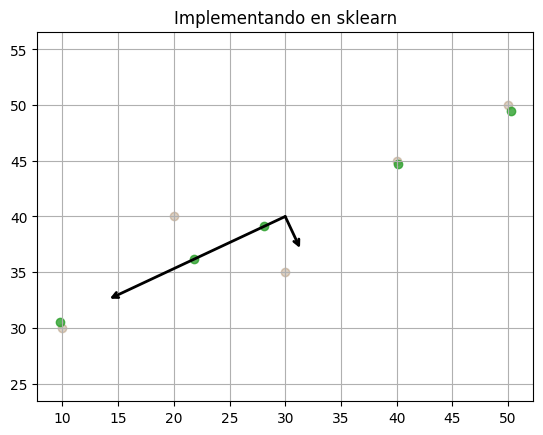

In [7]:
# plot data
plt.figure()
plt.scatter(D[:, 0], D[:, 1], alpha=0.2)
for length, vector in zip(pca.explained_variance_, pca.components_):
    v = vector *  np.sqrt(length)
    draw_vector(pca.mean_, pca.mean_ + v)
    print('printing  vector....',v)
plt.grid(True)
plt.axis('equal');

pca = PCA(n_components=1)
pca.fit(D)
X_pca = pca.transform(D)
print("original shape:   ", D.shape)
print("transformed shape:", X_pca.shape)
print(pca.explained_variance_)
X_new = pca.inverse_transform(X_pca)
plt.scatter(D[:, 0], D[:, 1], alpha=0.2)
plt.scatter(X_new[:, 0], X_new[:, 1], alpha=0.8)
plt.axis('equal')
plt.title("Implementando en sklearn");
